In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:

rides = pd.read_csv('Bike-Sharing-Dataset/hour.csv')

In [4]:
rides.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


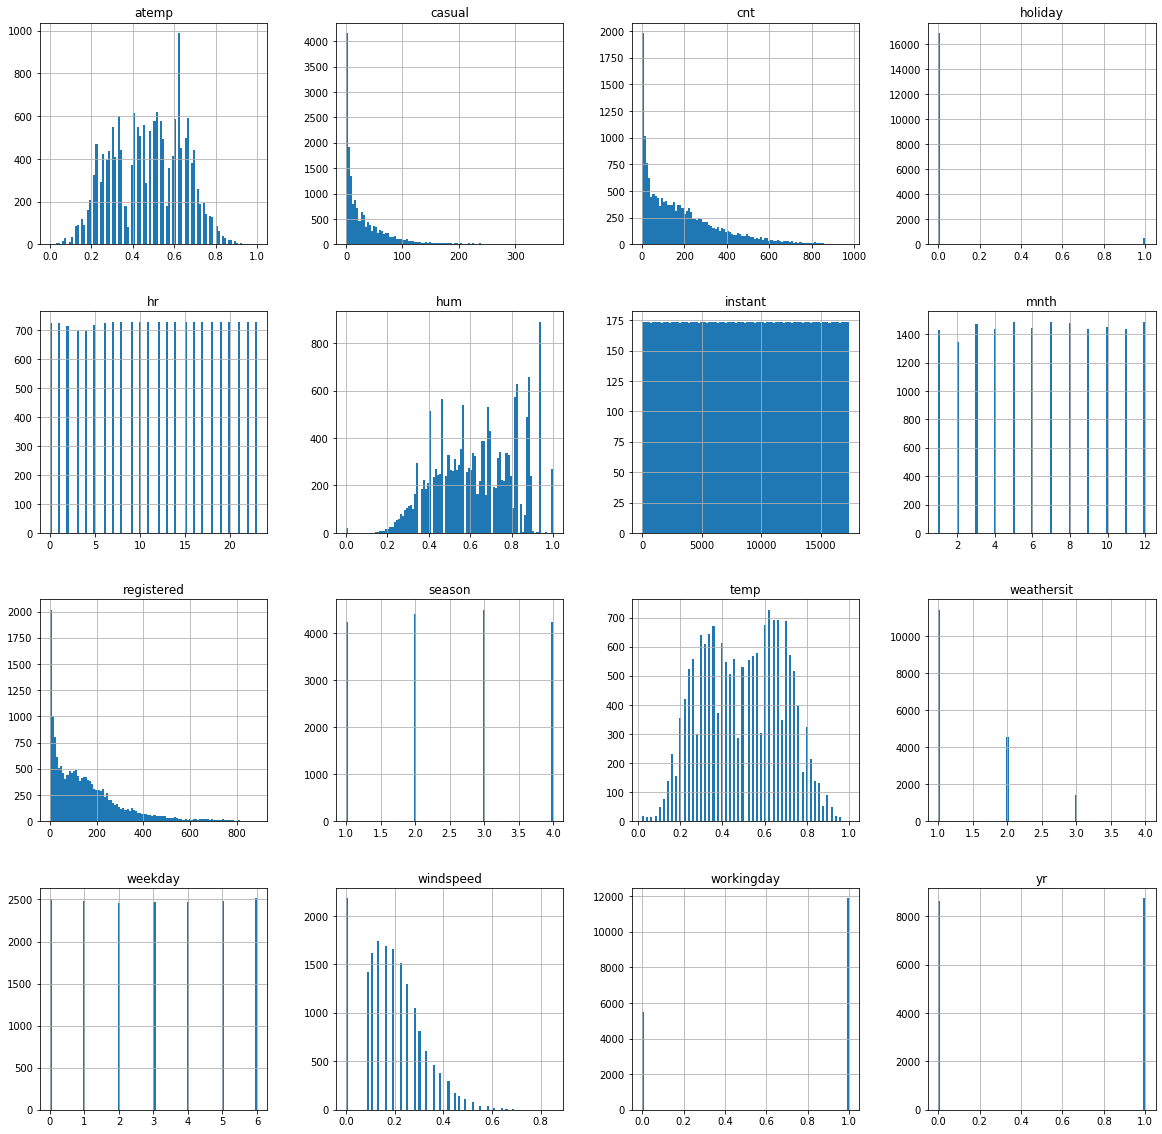

In [6]:
_ = rides.hist(bins = 100,figsize=(20,20))

In [7]:
dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(rides[each], prefix=each, drop_first=False)
    rides = pd.concat([rides, dummies], axis=1)

fields_to_drop = ['instant', 'dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = rides.drop(fields_to_drop, axis=1)
data.head()

,yr,holiday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,...,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0.24,0.81,0.0,3,13,16,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0.22,0.80,0.0,8,32,40,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0.22,0.80,0.0,5,27,32,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0.24,0.75,0.0,3,10,13,1,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0.24,0.75,0.0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
w = data.info()
type(w)
#w['Column']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            17379 non-null  int64  
 1   holiday       17379 non-null  int64  
 2   temp          17379 non-null  float64
 3   hum           17379 non-null  float64
 4   windspeed     17379 non-null  float64
 5   casual        17379 non-null  int64  
 6   registered    17379 non-null  int64  
 7   cnt           17379 non-null  int64  
 8   season_1      17379 non-null  uint8  
 9   season_2      17379 non-null  uint8  
 10  season_3      17379 non-null  uint8  
 11  season_4      17379 non-null  uint8  
 12  weathersit_1  17379 non-null  uint8  
 13  weathersit_2  17379 non-null  uint8  
 14  weathersit_3  17379 non-null  uint8  
 15  weathersit_4  17379 non-null  uint8  
 16  mnth_1        17379 non-null  uint8  
 17  mnth_2        17379 non-null  uint8  
 18  mnth_3        17379 non-nu

NoneType

In [9]:
e = list(data.columns[:8])
print(e)

['yr', 'holiday', 'temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


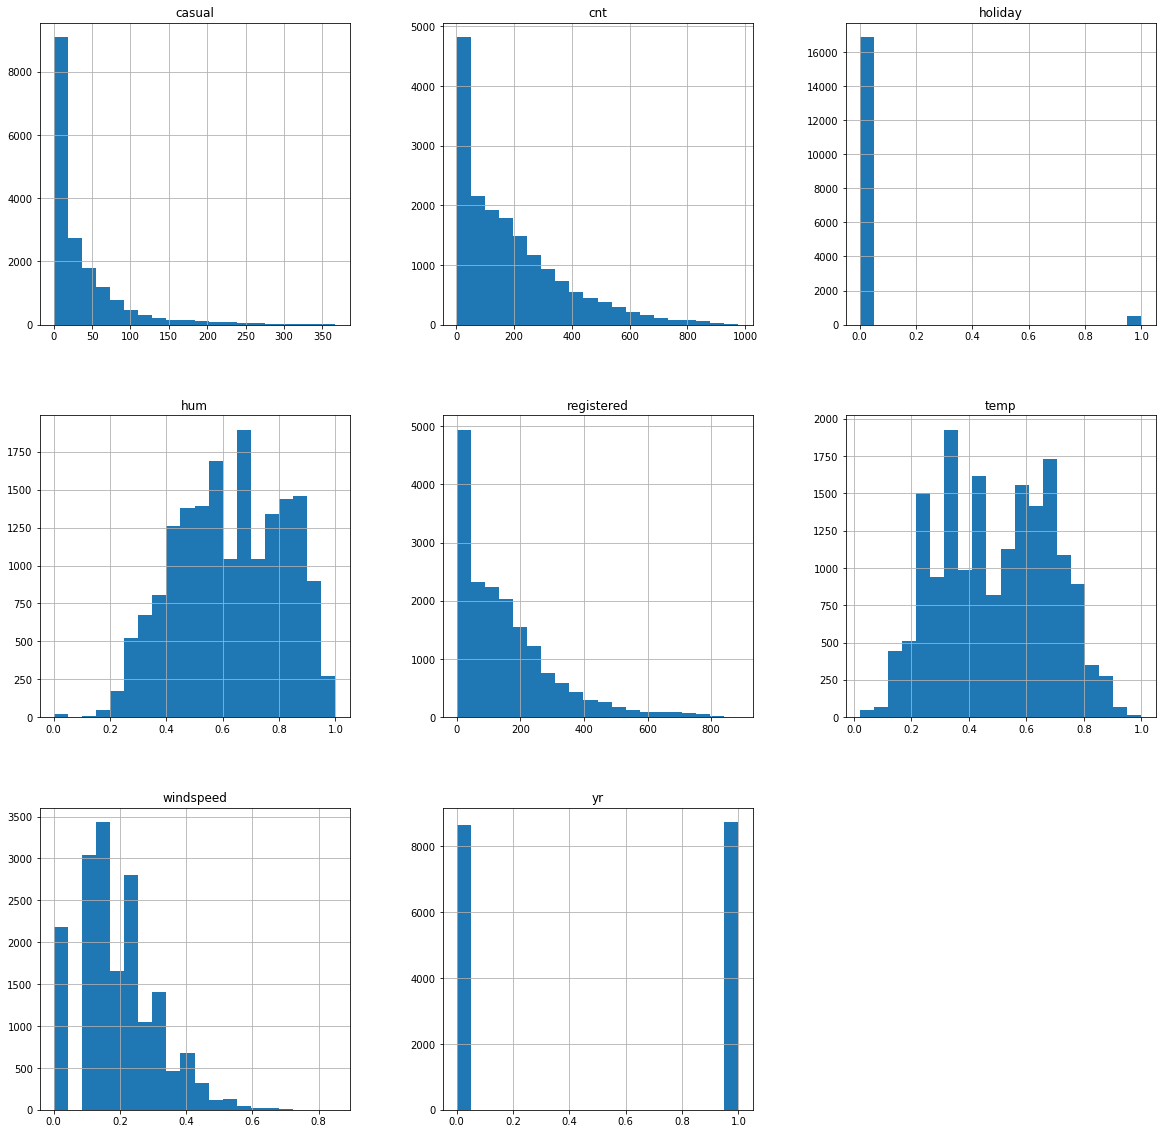

In [10]:
_ = data.hist(column = e,bins=20,figsize = (20,20))

In [12]:
d = ['cnt','casual','registered']
a1 = data.drop(['casual','registered'],axis=1)
a1.corr()['cnt'].sort_values(ascending=False)

cnt             1.000000
temp            0.404772
hr_17           0.313996
hr_18           0.272114
yr              0.250495
hr_8            0.195313
season_3        0.151621
hr_16           0.141443
hr_19           0.140710
weathersit_1    0.117478
windspeed       0.093234
mnth_9          0.084931
mnth_6          0.084600
mnth_8          0.081657
hr_13           0.074060
hr_12           0.073609
mnth_7          0.071459
hr_15           0.071259
season_2        0.060692
hr_14           0.059395
mnth_5          0.056422
mnth_10         0.054406
hr_20           0.042154
hr_9            0.034382
season_4        0.029421
hr_7            0.026036
hr_11           0.021519
weekday_4       0.015653
weekday_5       0.015034
weekday_2       0.003969
weekday_3       0.003746
weekday_6       0.001692
mnth_4         -0.003645
weathersit_4   -0.008340
weekday_1      -0.012860
hr_10          -0.018195
hr_21          -0.019769
mnth_11        -0.020074
weekday_0      -0.027118
holiday        -0.030927


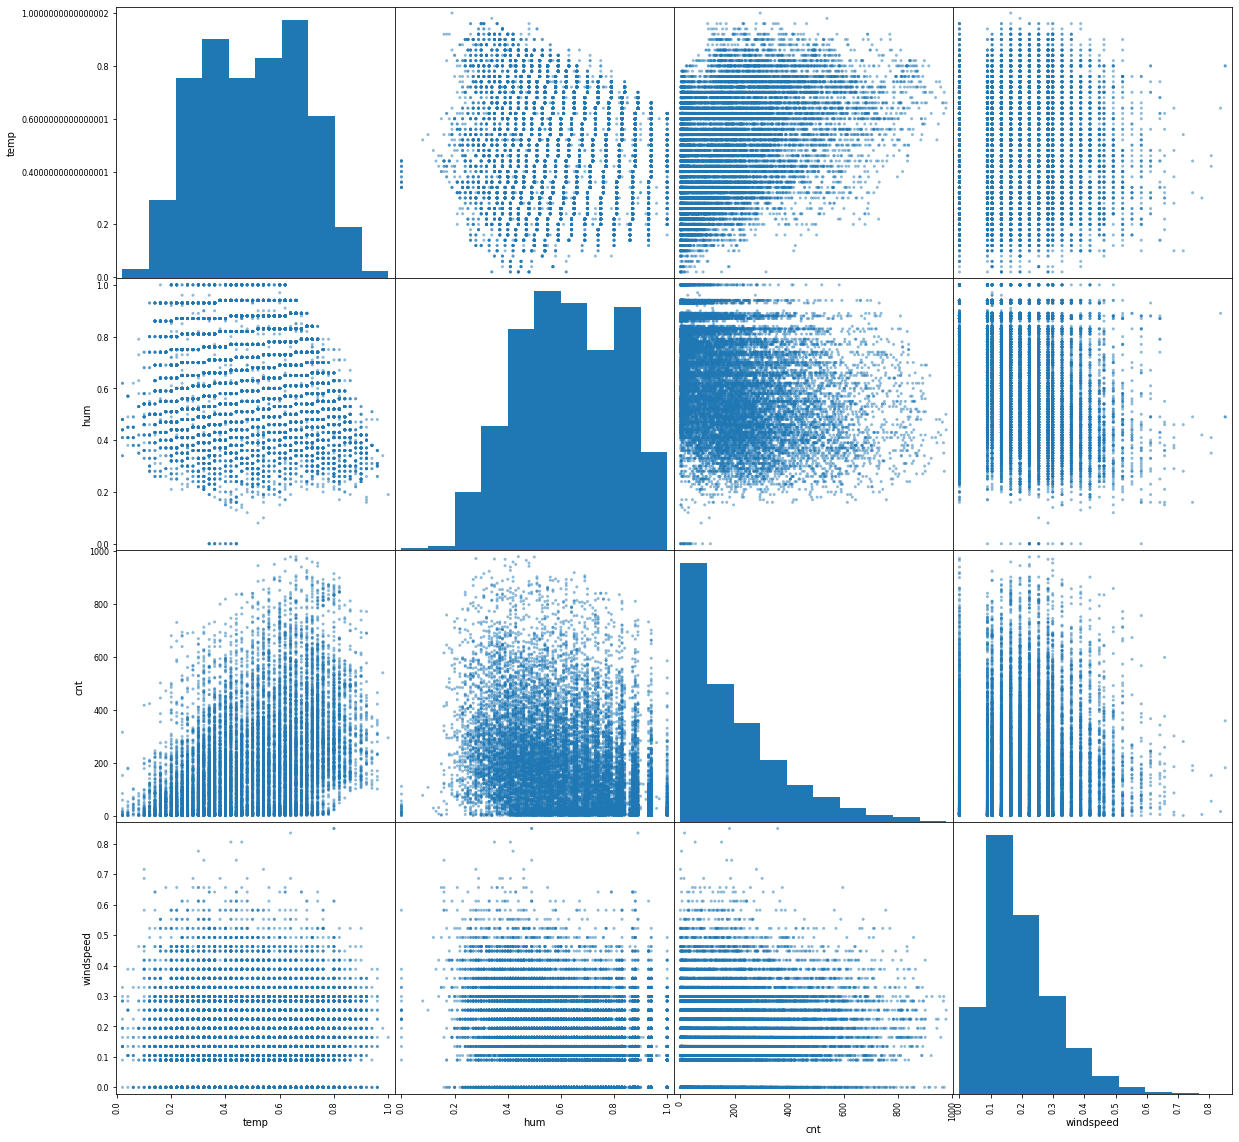

In [11]:
from pandas.plotting import scatter_matrix

att =  ['temp','hum','cnt','windspeed']
_=scatter_matrix(data[att],figsize=(20,20))

In [17]:
np.exp(-0.1),np.exp(-1),np.exp(-4)

(0.9048374180359595, 0.36787944117144233, 0.01831563888873418)

In [19]:
np.exp(-0.1),np.exp(-0.1),np.exp(-0.4)

(0.9048374180359595, 0.9048374180359595, 0.6703200460356393)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            17379 non-null  int64  
 1   holiday       17379 non-null  int64  
 2   temp          17379 non-null  float64
 3   hum           17379 non-null  float64
 4   windspeed     17379 non-null  float64
 5   casual        17379 non-null  int64  
 6   registered    17379 non-null  int64  
 7   cnt           17379 non-null  int64  
 8   season_1      17379 non-null  uint8  
 9   season_2      17379 non-null  uint8  
 10  season_3      17379 non-null  uint8  
 11  season_4      17379 non-null  uint8  
 12  weathersit_1  17379 non-null  uint8  
 13  weathersit_2  17379 non-null  uint8  
 14  weathersit_3  17379 non-null  uint8  
 15  weathersit_4  17379 non-null  uint8  
 16  mnth_1        17379 non-null  uint8  
 17  mnth_2        17379 non-null  uint8  
 18  mnth_3        17379 non-nu

In [26]:
T = data.drop(columns = ['cnt','registered','casual'])
T.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 56 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            17379 non-null  int64  
 1   holiday       17379 non-null  int64  
 2   temp          17379 non-null  float64
 3   hum           17379 non-null  float64
 4   windspeed     17379 non-null  float64
 5   season_1      17379 non-null  uint8  
 6   season_2      17379 non-null  uint8  
 7   season_3      17379 non-null  uint8  
 8   season_4      17379 non-null  uint8  
 9   weathersit_1  17379 non-null  uint8  
 10  weathersit_2  17379 non-null  uint8  
 11  weathersit_3  17379 non-null  uint8  
 12  weathersit_4  17379 non-null  uint8  
 13  mnth_1        17379 non-null  uint8  
 14  mnth_2        17379 non-null  uint8  
 15  mnth_3        17379 non-null  uint8  
 16  mnth_4        17379 non-null  uint8  
 17  mnth_5        17379 non-null  uint8  
 18  mnth_6        17379 non-nu

In [48]:

col = ['instant', 'dteday', 'atemp', 'workingday'] + ['cnt','registered','casual']
rx = rides.drop(columns=col)


from sklearn.decomposition import PCA


pca1 = PCA()
pca1.fit(rx)
evr = pca1.explained_variance_ratio_

array([7.28216712e-01, 1.93411224e-01, 6.12725120e-02, 6.38228022e-03,
       5.38931393e-03, 3.80668811e-03, 4.88264678e-04, 4.33062964e-04,
       4.15694379e-04, 1.84247141e-04])

In [49]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
X2D = pca.fit_transform(rx)

<IPython.core.display.Javascript object>


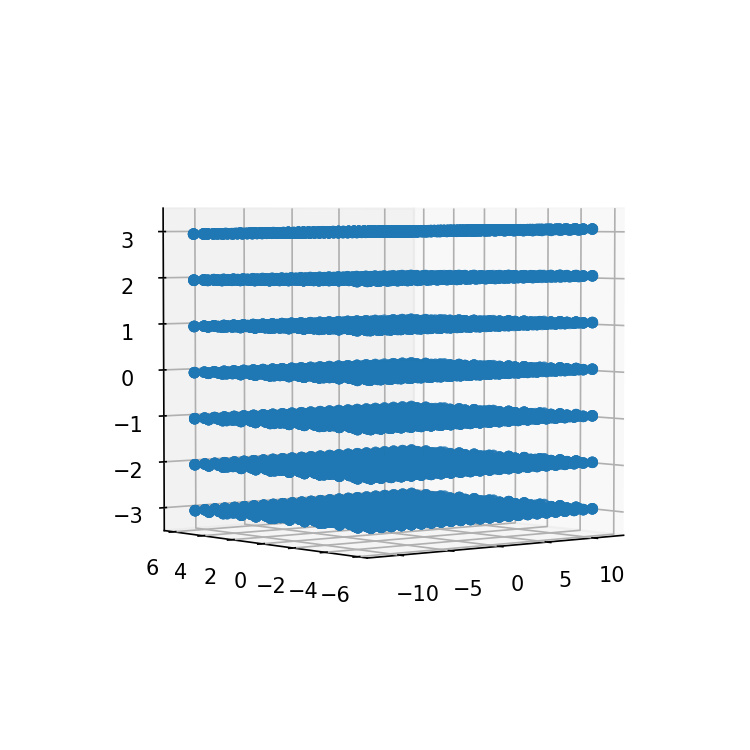

In [64]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.scatter(X2D[:,0],X2D[:,1],X2D[:,2],)


In [50]:
X2D

array([[ 11.52767089,   5.76183562,  -3.02766956],
       [ 10.52772121,   5.75797464,  -3.02876742],
       [  9.5277724 ,   5.75379277,  -3.02981702],
       ...,
       [ -9.43528559,  -4.88625904,   2.01275721],
       [-10.43547088,  -4.89022792,   2.01157701],
       [-11.43472381,  -4.89520647,   2.01087948]])

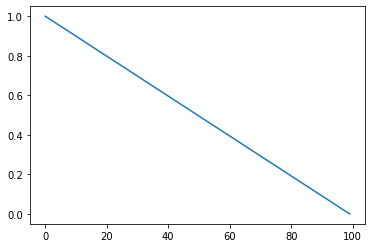

In [1]:
import numpy as np
import matplotlib.pyplot as plt

step_size = 100
max = 1
min = .00001
iterations = 1000

plt.plot(range(100),np.linspace(max,min,step_size))

#np.linspace(max,min,step_size)


In [11]:
a = [1,2,3,4]
b = [3,2,1,0]
c = [[1,2,3],[3,2,1],[100,99,98]]
#print(a)
print(np.cov(a,b,ddof=0)) #this considers N-1 by default (for Sample, however, ddof=0 set it to population)
np.var(a) #this considers N (for Population)
np.corrcoef(c)

[[ 1.25 -1.25]
 [-1.25  1.25]]


array([[ 1., -1., -1.],
       [-1.,  1.,  1.],
       [-1.,  1.,  1.]])

In [15]:
d = np.array(c)
d.T.dot(d)

array([[10010,  9908,  9806],
       [ 9908,  9809,  9710],
       [ 9806,  9710,  9614]])

In [31]:
s= (1-2.5)**2+(2-2.5)**2+(3-2.5)**2+(4-2.5)**2
s/3

1.6666666666666667

In [35]:
1000/901,1000/900

(1.1098779134295227, 1.1111111111111112)

In [44]:
x = np.arange(10)
y = np.arange(20,30,1)

g = np.mean(x*y)-np.mean(x)*np.mean(y)
print(g)

np.cov(x,y,ddof=0)

8.25


array([[8.25, 8.25],
       [8.25, 8.25]])

In [48]:
np.var(x)
x[:,None]
x[None,:]


array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [16]:
from sklearn.datasets import load_boston

load_boston().data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [102]:
rnd = np.random.RandomState(42)
X_org = rnd.normal(size=(1000, 3))
'''w = rnd.normal(size=3)
w
'''
rnd.poisson(lam=(100,500),size=(20))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

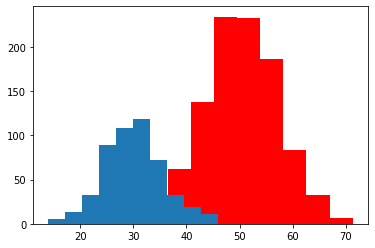

In [116]:
from numpy import random
import matplotlib.pyplot as plt
#import seaborn as sns

#sns.distplot(random.normal(loc=50, scale=7, size=1000), hist=False, label='normal')
plt.hist(random.normal(loc=50, scale=7, size=1000),bins=10,color='r')
plt.hist(random.poisson(lam=30, size=500),bins=10)

plt.show()

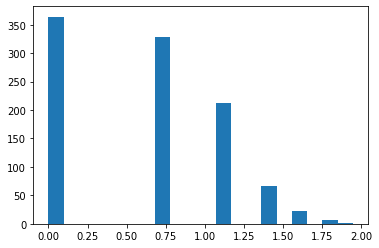

array([0.        , 0.69314718, 0.69314718, 0.69314718, 0.        ,
       0.69314718, 0.        , 0.        , 0.        , 1.60943791,
       0.69314718, 0.        , 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 1.09861229, 0.        , 1.38629436, 0.        ,
       1.09861229, 0.        , 0.        , 0.69314718, 0.        ,
       0.        , 1.09861229, 0.        , 0.69314718, 0.69314718,
       1.09861229, 0.69314718, 1.38629436, 0.        , 0.69314718,
       1.09861229, 0.69314718, 1.60943791, 0.69314718, 1.38629436,
       0.69314718, 1.38629436, 1.09861229, 0.69314718, 1.09861229,
       0.        , 0.69314718, 0.        , 0.        , 1.09861229,
       0.        , 1.09861229, 0.69314718, 0.69314718, 1.38629436,
       0.        , 1.09861229, 0.69314718, 0.        , 1.38629436,
       0.69314718, 1.09861229, 0.        , 1.79175947, 1.09861229,
       1.38629436, 0.69314718, 0.        , 1.38629436, 0.        ,
       0.69314718, 0.69314718, 0.        , 0.69314718, 0.69314

In [184]:
f = range(100)
plt.hist(np.log(np.random.poisson(size=1000)+1),bins=20)
plt.show()
np.log(np.random.poisson(size=100) + 1)

In [188]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)
X

array([[56, 18, 27],
       [81, 57,  3],
       [25,  9, 11],
       ...,
       [ 2, 16, 16],
       [ 7, 76,  4],
       [ 7,  3,  8]])

In [186]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:, 0])))

Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


In [190]:
len(bins)

141

Text(0.5, 0, 'Value')

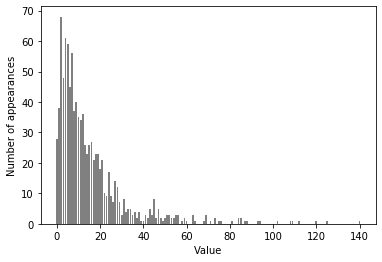

In [189]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='grey')
plt.ylabel("Number of appearances")
plt.xlabel("Value")